# Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

In [17]:
import mysql.connector;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from datetime import datetime



conn = mysql.connector.connect(user="root",
                               password="2301", 
                               host="localhost",
                               database = "transaccions",
                               port= "3306"
                               )

dfUsers = pd.read_sql("SELECT * FROM users", conn)
dfTransactions = pd.read_sql("SELECT * FROM transactions", conn)
dfCreditCards = pd.read_sql("SELECT * FROM credit_cards", conn)
dfCompanies = pd.read_sql("SELECT * FROM companies", conn)
dfCalendario = pd.read_sql("SELECT * FROM calendario", conn)

conn.close()

C:\Users\WindowsML\AppData\Local\Temp\ipykernel_11744\3933831947.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfUsers = pd.read_sql("SELECT * FROM users", conn)
C:\Users\WindowsML\AppData\Local\Temp\ipykernel_11744\3933831947.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfTransactions = pd.read_sql("SELECT * FROM transactions", conn)
C:\Users\WindowsML\AppData\Local\Temp\ipykernel_11744\3933831947.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCreditCards = pd.read_sql("SELECT * FROM credit_cards", c

<h3> Exercici 1 : Una variable numèric </h3>
<p>El histograma muestra cuántas transacciones hay en cada rango de amount.</p>
<p>Vemos que los amounts mas bajos son los que mas transacciones tienen en comparacion con otros rangos.</p>
<p>La distribucion de el numero de transacciones es bastante uniforme, hay picos en rangos altos y bajos.</p>




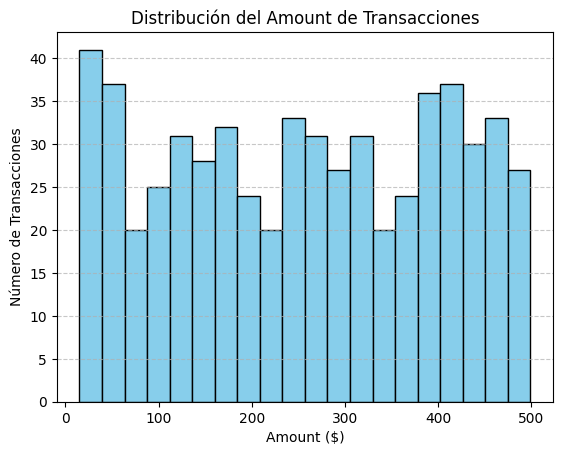

In [18]:
plt.hist(
    dfTransactions['amount'],  
    bins=20,                 
    color='skyblue',         
    edgecolor='black'         
)

plt.title('Distribución del Amount de Transacciones')
plt.xlabel('Amount ($)')
plt.ylabel('Número de Transacciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h3>Exercici 2: Dues variables numèriques.</h3>
<p>Aqui anlizamos si hay aluguna relacion entre la edad de los usuarios y el promedio de dinero que gastan en una transacciones.</p>
<p>Vemos que no hay una tendencia clara, y que algunas edades como 31 y 41 años presentan picos más altos de gasto promedio.</p>
<p>Esto nos puede dar que pensar de que el gasto en una transaccion no depende de la edad exclusivamente</p>


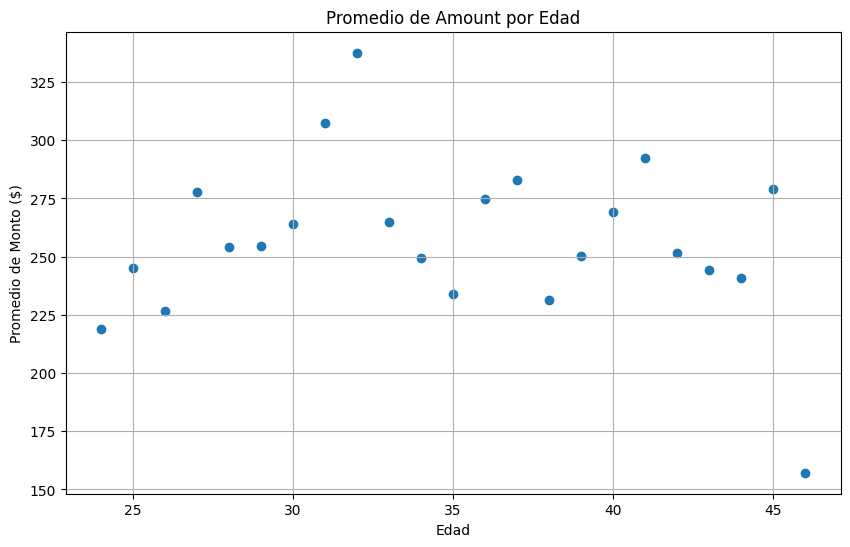

In [ ]:
# Convertir birth_date a datetime
dfUsers['birth_date'] = pd.to_datetime(dfUsers['birth_date'], errors='coerce')

# Eliminar usuarios sin fecha de nacimiento válida
dfUsers = dfUsers.dropna(subset=['birth_date'])


hoy = pd.Timestamp.today()
dfUsers['edad'] = dfUsers['birth_date'].apply(
    lambda fecha: hoy.year - fecha.year - ((hoy.month, hoy.day) < (fecha.month, fecha.day))
)

# Unir transacciones con usuarios
df_merged = dfTransactions.merge(dfUsers, left_on='user_id', right_on='id')

# Agrupar por edad y calcular promedio de amount
df_avg = df_merged.groupby('edad')['amount'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(df_avg['edad'], df_avg['amount'])
plt.title('Promedio de Amount por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Monto ($)')
plt.grid(True)
plt.show()


<h3> Exercici 3: Una variable categòrica. </h3>

<p> Este grafico muestra los países con mayor cantidad de usuarios. </p>
<p> Podemos observar que Estados Undios es el pais con mas cantidad de usuarios, cerca del doble.</p>

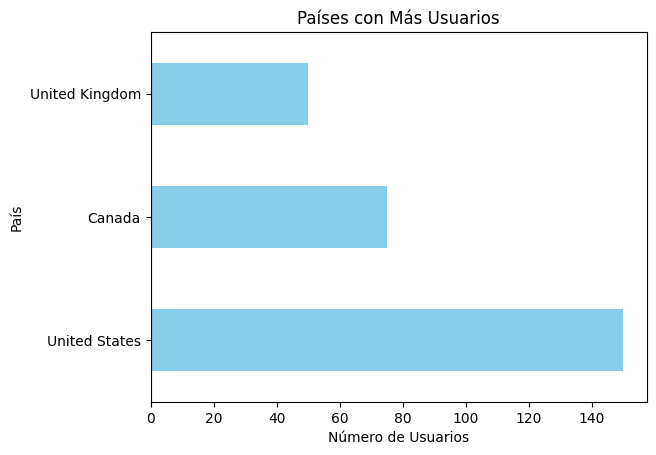

In [20]:
dfUsers['country'].value_counts().plot.barh(
    title='Países con Más Usuarios',
    color='skyblue'
)

plt.xlabel('Número de Usuarios')
plt.ylabel('País')
plt.show()

<h3> Exercici 4: Una variable categòrica i una numèrica. </h3>

<p> Este grafico muestre el Amount total acumulado por pais </p>
<p> Se puede observar como Canada es la que mas amount gasta en total. </p>
<p> En comparación con el gráfico anterior, podemos ver que Canadá tiendo menos usuarios que estrados unidos los usuarios gastan más por transacciones o tienen más transacciones. </p>

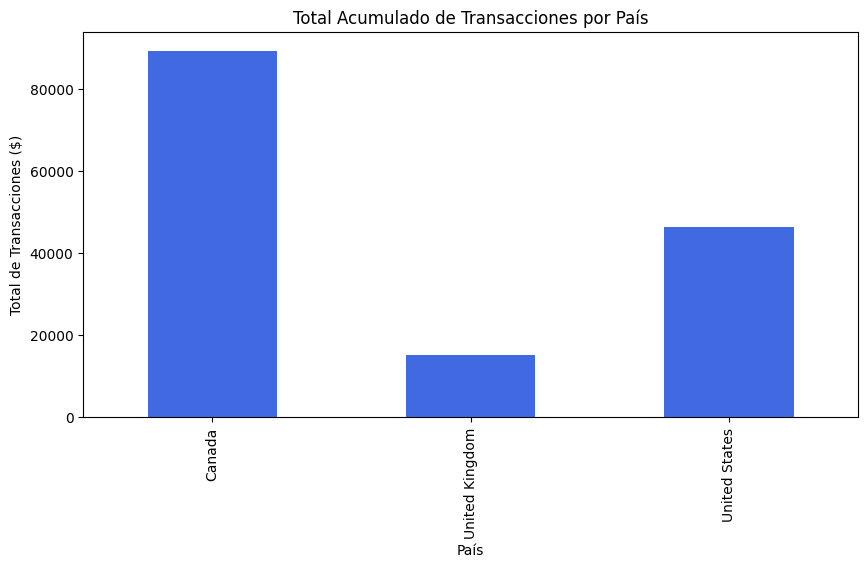

In [ ]:
# Unir dfTransactions con dfUsers para obtener el país de cada transacción
dfTrUsers = pd.merge(
    dfTransactions,
    dfUsers, 
    left_on='user_id',
    right_on='id',
    how='inner'
)

# Calcular el total de transacciones por país
total_por_pais = dfTrUsers.groupby('country')['amount'].sum()


total_por_pais.plot.bar(
    title='Total Acumulado de Transacciones por País',
    color='royalblue',
    figsize=(10, 5)
)
plt.xlabel('País')
plt.ylabel('Total de Transacciones ($)')
plt.grid(axis='y', linestyle=' ', alpha=0.7)
plt.show()

<h3> Exercici 5: Dues variables categòriques. </h3>

<p> Este gráfico muestra la comparación de Transacciones Aprobadas y Declinadas de cada País. </p>
<p> El gráfico muestra que Canadá tiene la mayor cantidad de transacciones tanto aprobadas como declinadas.</p>
<p> Estados Unidos y Reino Unido todas las transacciones fueron aprobadas cuantas menos transacciones menos probabilidad de tener rechazadas.</p>

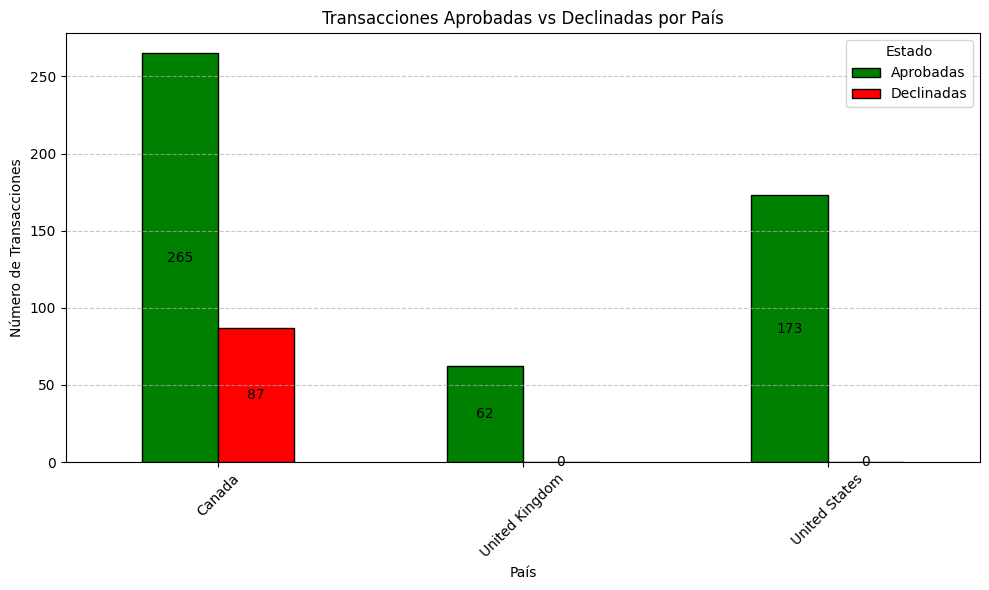

In [ ]:
#dfTrUsers es del ex4 donde ya se une transactions con users
counts = dfTrUsers.groupby(['country', 'declined']).size().unstack(fill_value=0)
counts.columns = ['Aprobadas', 'Declinadas']


ax = counts.plot.bar(   
    figsize=(10, 6),
    color=['green', 'red'],
    edgecolor='black'
)
plt.title('Transacciones Aprobadas vs Declinadas por País')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for p in ax.containers:
    ax.bar_label(p, label_type='center', fmt='%d')

plt.tight_layout()
plt.show()




<h3> Exercici 6: Tres variables. </h3>

<p> El gráfico muestra el promedio de Amount de las transacciones separado por aprobadas y rechazadas, agrupándolas por país. </p>
<p> Como se puede observar el promedio del Amount no varía mucho entre países. </p>
<p> El promedio más alto rechazado es el de Canda siendo la única que tienes transacciones rechazadas </p>

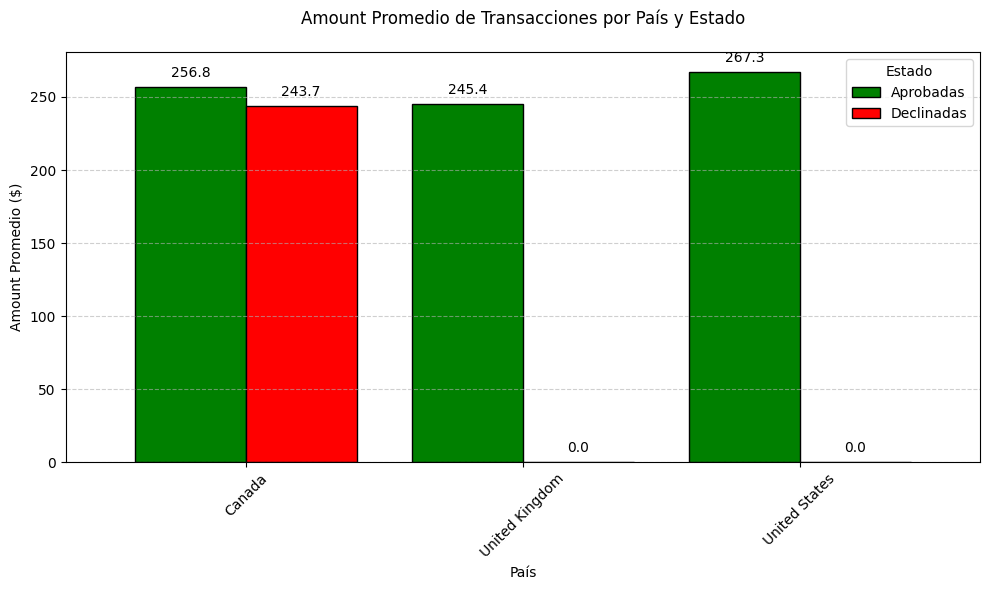

In [ ]:
#Amount -> Numerica
#Country y Declined -> Categorica

agg_data = dfTrUsers.groupby(['country', 'declined'])['amount'].mean().unstack()
agg_data.columns = ['Aprobadas', 'Declinadas'] 

# Gráfico de barras agrupadas
ax = agg_data.plot.bar( 
    figsize=(10, 6),
    color=['green', 'red'],
    edgecolor='black',
    width=0.8
)


plt.title('Amount Promedio de Transacciones por País y Estado', pad=20)
plt.xlabel('País')
plt.ylabel('Amount Promedio ($)')
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f', label_type='edge', padding=5)

plt.tight_layout()
plt.show()

<h3> Exercici 7: Graficar un Pairplot. </h3>

<p> En este Grafico podremos ver si las personas mayores gastan más o menos en promedio, y si dependiendo de la edad se haen mas o menos transacciones. </p>
<p> Si hay alguna correlación clara entre edad y comportamiento de compra.</p>
<p> El gráfico muestra que la edad de las personas está entre 25 y 35 años, pero la mayoria estan entre los 30</p>
<p> El número de transacciones suele ser bajo, mayormente menos de 20, mientras que el amount promedio varía mucho, con un pico cerca de 100-200.</p>
<p> No parece haber una relación clara entre edad, transacciones y monto.</p>

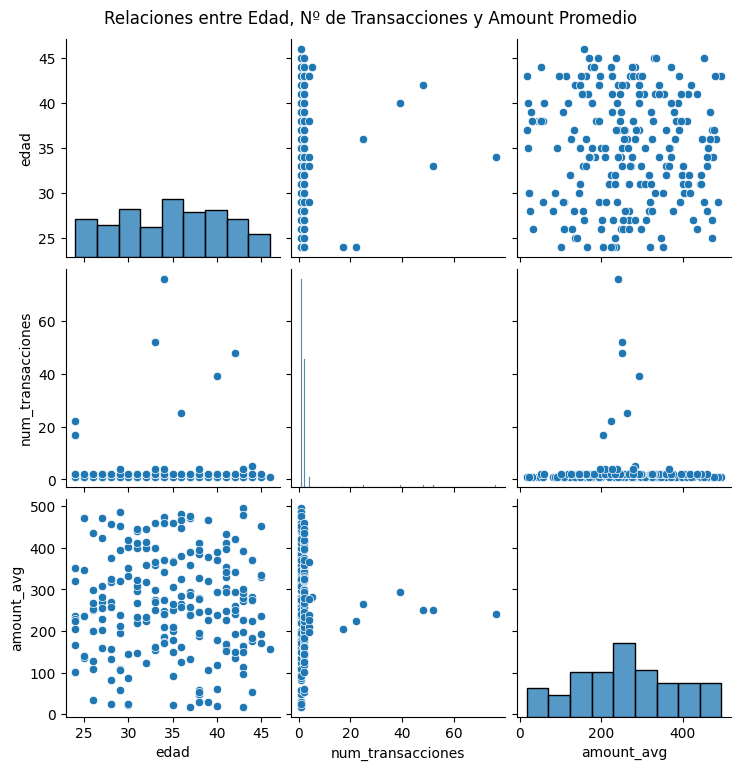

In [ ]:
# Calcular edad
dfUsers['birth_date'] = pd.to_datetime(dfUsers['birth_date'], errors='coerce')
dfUsers = dfUsers.dropna(subset=['birth_date'])
hoy = pd.Timestamp.today()
dfUsers['edad'] = dfUsers['birth_date'].apply(
    lambda fecha: hoy.year - fecha.year - ((hoy.month, hoy.day) < (fecha.month, fecha.day))
)

# Agregaciones por usuario
df_tx_agg = dfTransactions.groupby('user_id').agg({
    'amount': ['count', 'mean']
}).reset_index()
df_tx_agg.columns = ['user_id', 'num_transacciones', 'amount_avg']

# Merge con edad
df_final = dfUsers.merge(df_tx_agg, left_on='id', right_on='user_id', how='inner')


df_plot = df_final[['edad', 'num_transacciones', 'amount_avg']]
sns.pairplot(df_plot)
plt.suptitle('Relaciones entre Edad, Nº de Transacciones y Amount Promedio', y=1.02)
plt.show()


# Nivell 2


<h3> Exercici 1: Correlació de totes les variables numèriques. </h3>

<p> En este grafico podemos ver la ver posibles relaciones entre edad, amount, número de tarjetas, etc.</p>
<p> Este mapa de calor muestra que no hay practicamente correlaciones entre las variables numéricas. </P>
<p> La variable 'declined' tiene una correlación moderada (0.41) con 'id', lo cual puede indicar un patrón relacionado con ciertos usuarios. </p>
<p> Las demás variables tienen correlaciones muy cercanas a cero, lo que indica independencia entre ellas. </p>

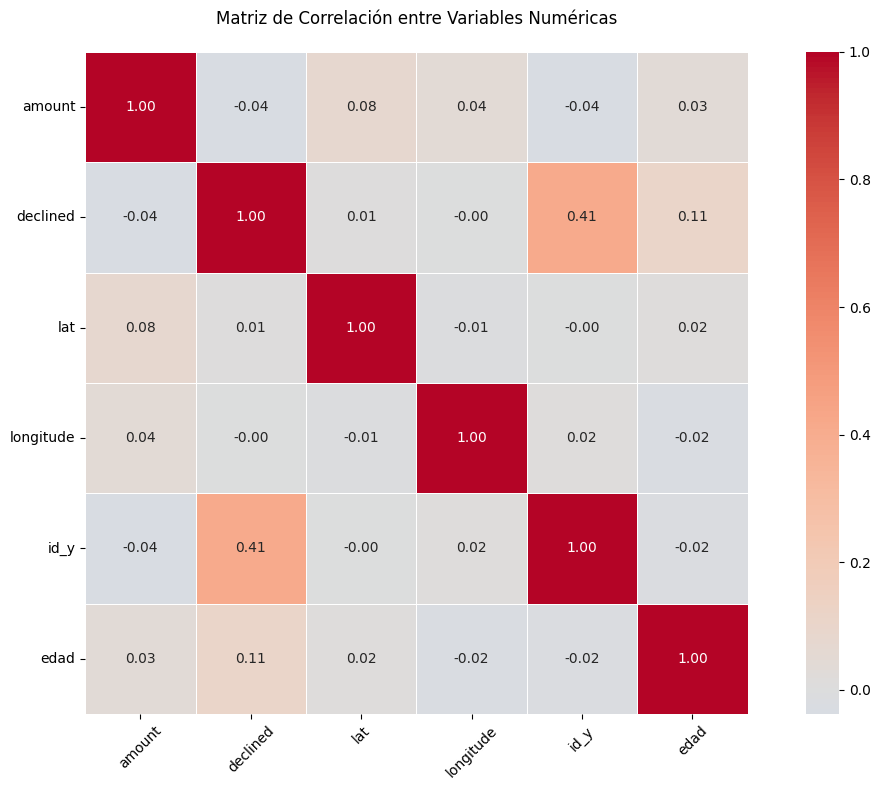

In [ ]:
# Seleccionar columnas numéricas de cada DataFrame
num_transactions = dfTransactions.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_users = dfUsers.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_credit_cards = dfCreditCards.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Eliminar columnas no numéricas o redundantes (como 'id' y 'user_id')
df_numeric = dfTrUsers.select_dtypes(include=['float64', 'int64']).drop(columns=['user_id', 'id'], errors='ignore')


# Calcular correlaciones
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,           
    fmt=".2f",            
    cmap='coolwarm',      
    center=0,            
    linewidths=0.5,      
    square=True          
)

plt.title('Matriz de Correlación entre Variables Numéricas', pad=20)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()
plt.show()

<h3> Exercici 2: Implementa un jointplot. </h3>

<p> En este gráfico vemos si hay una relación entre la edad de los usuarios y el amount promedio que gastan por transacción </p>
<p> Podemos ver que no hay una relación clara entre la edad de los usuarios y el amount promedio que gastan por transacción. </p>
<p> Los puntos están bastante dispersos en todas las edades. Si que es possible ver que el amount promedio esta entre 100 - 300 </P> 
<p> Esto nos dice que la edad no afecta mucho en cuánto se gasta de media por transsaccion </pp>

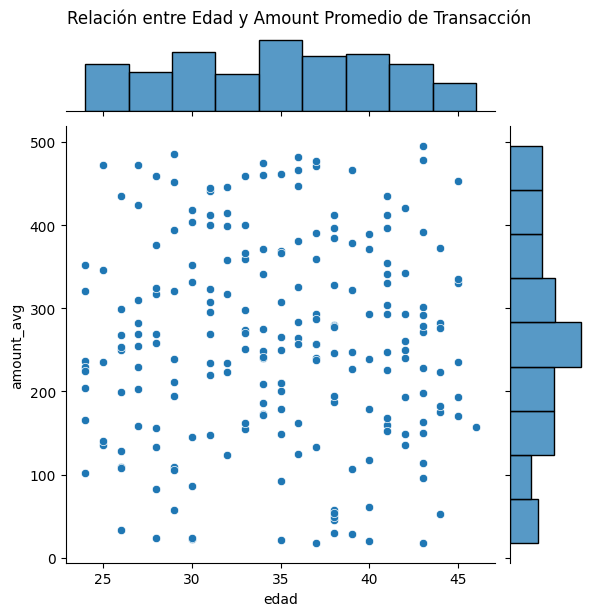

In [ ]:
# Calcular edad
dfUsers['birth_date'] = pd.to_datetime(dfUsers['birth_date'], errors='coerce')
dfUsers = dfUsers.dropna(subset=['birth_date'])
hoy = pd.Timestamp.today()
dfUsers['edad'] = dfUsers['birth_date'].apply(
    lambda fecha: hoy.year - fecha.year - ((hoy.month, hoy.day) < (fecha.month, fecha.day))
)

# Promedio de monto por usuario
df_tx_avg = dfTransactions.groupby('user_id')['amount'].mean().reset_index()
df_tx_avg.columns = ['user_id', 'amount_avg']

# Unir con usuarios
df_final = dfUsers.merge(df_tx_avg, left_on='id', right_on='user_id', how='inner')


sns.jointplot(data=df_final, x='edad', y='amount_avg', kind='scatter', height=6)
plt.suptitle('Relación entre Edad y Amount Promedio de Transacción', y=1.02)
plt.show()


# Nivell 3

<h3> Exercici 1: Implementa un violinplot combinat amb un altre tipus de gràfic. </h3>

<p> En este gráfico combinado (violín y boxplot) muestra cómo varían los amount de transacciones por pais </p> 
<p> Las distribuciones de amount son iguales practicamente entre los países, con valores máximos en $500 y mínimos entre 15$ - 18$ </p>
<p> La mayoría de las transacciones estan entre $150 y $400 </p>

C:\Users\WindowsML\AppData\Local\Temp\ipykernel_11744\88958714.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


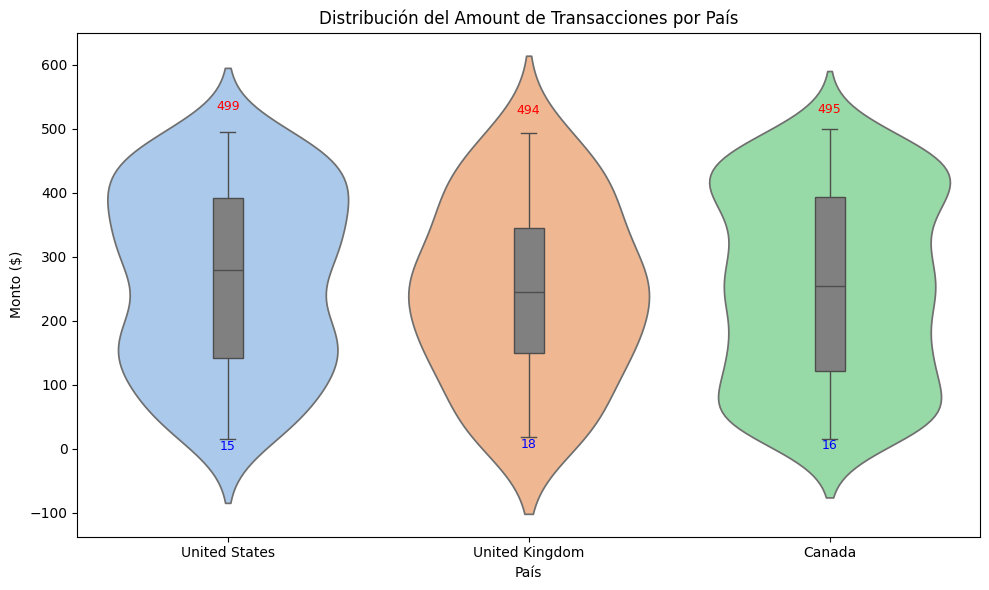

In [ ]:
# Unir transacciones con país del usuario
df_tx_country = dfTransactions.merge(
    dfUsers[['id', 'country']], 
    left_on='user_id', right_on='id'
)

# Eliminar nulos
df_tx_country = df_tx_country.dropna(subset=['country', 'amount'])

# Filtrar países con suficientes datos
top_countries = df_tx_country['country'].value_counts().index
df_tx_country = df_tx_country[df_tx_country['country'].isin(top_countries)]

# Calcular mínimo y máximo por país
stats = df_tx_country.groupby('country')['amount'].agg(['min', 'max'])


plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_tx_country,
    x='country', y='amount',
    inner=None, palette='pastel'
)
sns.boxplot(
    data=df_tx_country,
    x='country', y='amount',
    width=0.10, color='gray', fliersize=0
)

# Anotar mínimo y máximo sobre cada país
for country in stats.index:
    x = list(stats.index).index(country)
    y_min = stats.loc[country, 'min']
    y_max = stats.loc[country, 'max']
    plt.text(x, y_min - (0.05 * y_min), f"{y_min:.0f}", 
             ha='center', va='top', fontsize=9, color='blue')
    plt.text(x, y_max + (0.05 * y_max), f"{y_max:.0f}", 
             ha='center', va='bottom', fontsize=9, color='red')


plt.title('Distribución del Amount de Transacciones por País')
plt.xlabel('País')
plt.ylabel('Monto ($)')
plt.tight_layout()
plt.show()

<h3> Exercici 2: Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament </h3>

<p> Este grafico muestra uan cuadrícula de histogramas (con FacetGrid) para visualizar cómo se distribuyen transacciones por amount según el pais y el estado (declinado) </p>
<p> El unico pais con transacciones rechazadas es Canadá. </p>
<p> En Canadá, las transacciones rechazadas están concentradas en amounts mas bajos, aunque hay algunas de alto valor por ejemplo en 350$ - 400$ </p>
<p> En todos los países, los amount de transacciones aprobadas están distribuidos de forma uniforme. </p>

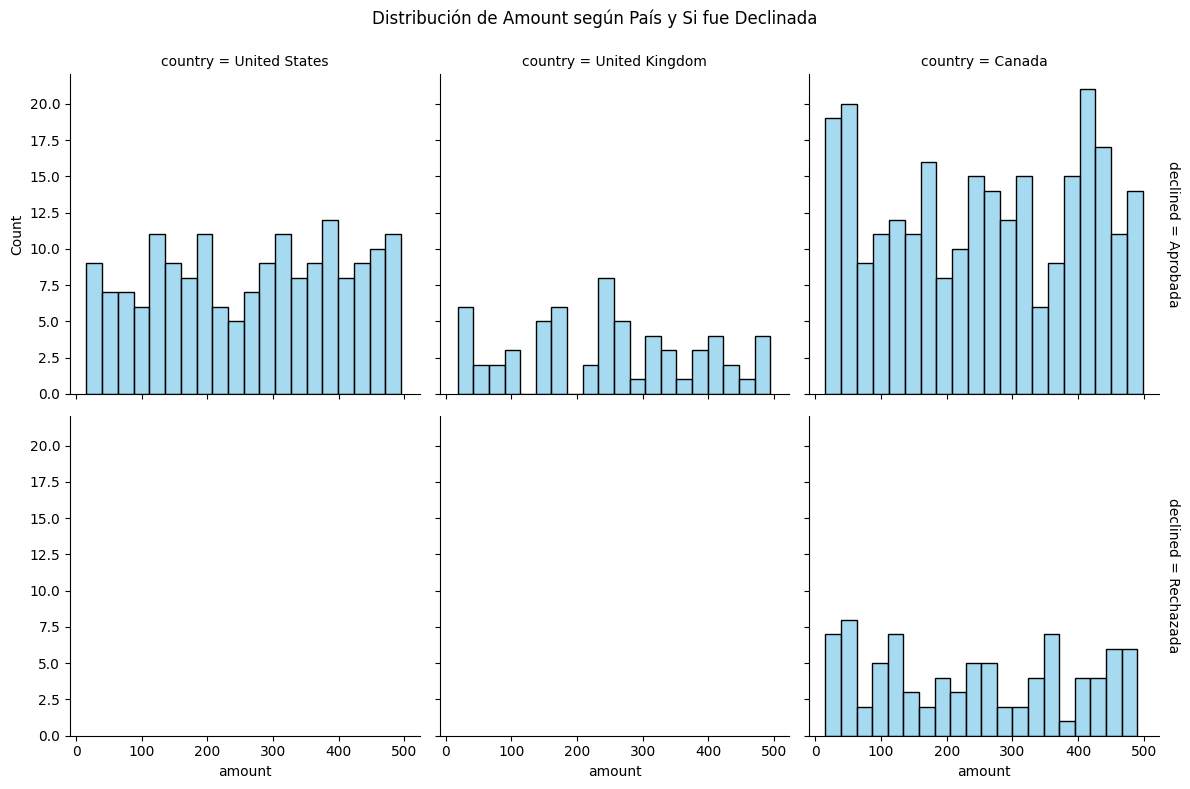

In [32]:

# Unir transacciones con país del usuario
df_tx_country = dfTransactions.merge(dfUsers[['id', 'country']], left_on='user_id', right_on='id')

# Convertir la columna declined a texto para que se vea más claro
df_tx_country['declined'] = df_tx_country['declined'].map({0: 'Aprobada', 1: 'Rechazada'})

# Crear FacetGrid: un gráfico por cada país
g = sns.FacetGrid(df_tx_country, col='country', row='declined', height=4, margin_titles=True)
g.map_dataframe(sns.histplot, x='amount', bins=20, color='skyblue')

# Ajustes estéticos
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Amount según País y Si fue Declinada')
plt.show()

In [ ]:

dataframe = {}

dataframe = {
    "dfUsers" :dfUsers,
    "dfTransactions" : dfTransactions,
    "dfCreditCards" : dfCreditCards,
    "dfCompanies" : dfCompanies,
    "dfCalendario" : dfCalendario,
}

In [34]:
dataframe
for name, df in dataframe.items():
    df.to_csv(f"{name}.csv", index=False)